In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
%matplotlib inline

In [162]:
df = pd.read_csv('FY2020_Dallas_Animal_Shelter_Data.csv')

In [163]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,006301,4,OWNER SURRENDER,GENERAL,1,PERSNLISSU,CDM,11/08/2019,15:48:00,11/14/2019,APP SICK,NaN,RETURNED TO OWNER,WALK IN,11/09/2019,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,007102,2,OWNER SURRENDER,DEAD ON ARRIVAL,1,OTHRINTAKS,CDM,11/10/2019,14:18:00,11/10/2019,DEAD,NaN,DEAD ON ARRIVAL,DISPOSAL,11/10/2019,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,004600,1,STRAY,AT LARGE,1,OTHER,MG1718,10/03/2019,11:08:00,10/03/2019,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,10/03/2019,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,016605,8,OWNER SURRENDER,GENERAL,1,OTHER,RA 1549,10/11/2019,09:55:00,10/17/2019,TREATABLE REHABILITABLE NON-CONTAGIOUS,EMERGENCY RESCUE,TRANSFER,MEDICAL-CONTAGIOUS,10/15/2019,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,006900,1,STRAY,AT LARGE,1,OTHRINTAKS,JR,11/08/2019,11:55:00,11/14/2019,APP WNL,RESCU ONLY,RETURNED TO OWNER,WALK IN,11/09/2019,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


## Data Cleaning

In [164]:
df.columns = map(str.lower, df.columns)

In [165]:
df.columns = df.columns.str.replace(' ', '_')

In [166]:
df = df.drop(['tag_type', 'activity_number', 'activity_sequence', 'source_id', 'census_tract', 
              'intake_total', 'receipt_number', 'impound_number', 'service_request_number', 
              'additional_information', 'council_district', 'hold_request', 'intake_time',
              'outcome_time'], axis=1)


In [167]:
# for the reason column, we want to combine both Other values and turn the NANS into Unknown
df.reason = df.reason.apply(lambda x: x if (x == 'PERSNLISSU' or
                                            x == 'MEDICAL' or 
                                            x == 'HOUSING' or
                                            x == 'NOTRIGHTFT' or
                                            x == 'FINANCIAL' or
                                            x == 'OTHRINTAKS' or 
                                            x == 'OTHER')
                            else 'UNKNOWN')

In [168]:
df.outcome_condition = df.outcome_condition.fillna('UNKNOWN')

In [169]:
df.chip_status = df.chip_status.fillna('UNKNOWN')

In [170]:
df.animal_origin = df.animal_origin.fillna('UNKNOWN')

In [171]:
df.dropna(subset = ['outcome_date'], inplace=True)

In [172]:
df['intake_date'] = pd.to_datetime(df['intake_date'])
df['due_out'] = pd.to_datetime(df['due_out'])
df['outcome_date'] = pd.to_datetime(df['outcome_date'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31695 entries, 0 to 31917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   animal_id          31695 non-null  object        
 1   animal_type        31695 non-null  object        
 2   animal_breed       31695 non-null  object        
 3   kennel_number      31695 non-null  object        
 4   kennel_status      31695 non-null  object        
 5   intake_type        31695 non-null  object        
 6   intake_subtype     31695 non-null  object        
 7   reason             31695 non-null  object        
 8   staff_id           31695 non-null  object        
 9   intake_date        31695 non-null  datetime64[ns]
 10  due_out            31695 non-null  datetime64[ns]
 11  intake_condition   31695 non-null  object        
 12  outcome_type       31695 non-null  object        
 13  outcome_subtype    31695 non-null  object        
 14  outcom

In [174]:
df['length_of_stay'] = df['outcome_date'] - df['intake_date']

In [175]:
df['est_length_of_stay'] = df['due_out'] - df['intake_date']

In [176]:
df['difference_in_stay'] = df['est_length_of_stay'] - df['length_of_stay']

In [177]:
df.length_of_stay.value_counts()

0 days      10979
1 days       4116
2 days       2663
4 days       2374
6 days       1544
3 days       1506
5 days       1382
7 days        849
32 days       603
31 days       545
8 days        534
10 days       488
11 days       465
9 days        430
33 days       305
12 days       298
13 days       247
14 days       213
34 days       189
15 days       182
17 days       143
16 days       141
35 days       121
19 days       103
18 days        99
36 days        89
21 days        74
37 days        72
22 days        64
20 days        62
38 days        54
24 days        48
25 days        46
27 days        46
26 days        44
23 days        42
39 days        41
29 days        41
28 days        37
30 days        34
41 days        31
40 days        24
46 days        23
45 days        21
43 days        19
44 days        19
42 days        17
48 days        16
47 days        14
50 days        13
53 days        12
52 days        10
58 days        10
51 days        10
49 days        10
55 days   

In [178]:
#Remove obvious outliers
df = df.loc[df['length_of_stay'] < "60 days"]

In [179]:
#Find potential outliers using IQR.
quartiles = df['length_of_stay'].quantile([.25,.5,.75])

#Use numpy timedelta to convert seconds to days.
lowerq = quartiles[0.25] / np.timedelta64(1, 'D')
upperq = quartiles[0.75] / np.timedelta64(1, 'D')
iqr = upperq-lowerq

print(f"The lower quartile of Length of Stay is: {lowerq}")
print(f"The upper quartile of Length of Stay is: {upperq}")
print(f"The interquartile range of Length of Stay is: {iqr}")
print(f"The the median of Length of Stay is: {quartiles[0.5] / np.timedelta64(1, 'D')} ")

upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Length of Stay is: 0.0
The upper quartile of Length of Stay is: 6.0
The interquartile range of Length of Stay is: 6.0
The the median of Length of Stay is: 2.0 
Values above 15.0 could be outliers.


APP WNL                                   18128
TREATABLE REHABILITABLE NON-CONTAGIOUS     3106
APP SICK                                   1520
APP INJ                                    1271
UNKNOWN                                    1146
UNDERAGE                                    876
CRITICAL                                    328
HEALTHY                                     111
UNHEALTHY UNTREATABLE NON-CONTAGIOUS         95
TREATABLE MANAGEABLE NON-CONTAGIOUS          75
TREATABLE REHABILITABLE CONTAGIOUS           32
DECEASED                                     28
FATAL                                        17
TREATABLE MANAGEABLE CONTAGIOUS               5
DEAD                                          4
UNHEALTHY UNTREATABLE CONTAGIOUS              2

In [180]:
#clean intakes

Healthy
df.loc[df['intake_condition'].str.contains('HEALTHY'), 'intake_condition'] = 'HEALTHY'
df.loc[df['intake_condition'].str.contains('WNL'), 'intake_condition'] = 'HEALTHY'
df.loc[df['Intake Condition'].str.contains('NORMAL'), 'Intake Condition'] = 'HEALTHY'

Sick
APP SICK
APP INJ
UNHEALTHY UNTREATABLE NON-CONTAGIOUS

Treatable
df.loc[df['Intake Condition'].str.contains('MANAGEABLE NON-CONTAGIOUS'), 'Intake Condition'] = 'MANAGEABLE NON-CONTAGIOUS'
TREATABLE REHABILITABLE NON-CONTAGIOUS

Contagious
Critical

df.loc[df['Intake Condition'].str.contains('REHABILITABLE NON-CONTAGIOUS'), 'Intake Condition'] = 'REHABILITABLE NON-CONTAGIOUS'
cleaner_df.loc[cleaner_df['Intake Condition'].str.contains(' CONTAGIOUS'), 'Intake Condition'] = 'CONTAGIOUS'


CRITICAL/UNDERAGE
UNHEALTHY UNTREATABLE NON-CONTAGIOUS
UNKNOWN

Passed
DECEASED
FATAL  
DEAD




cleaner_df.loc[cleaner_df['Intake Condition'].str.contains('UNTREATABLE NON-CONTAGIOUS'), 'Intake Condition'] = 'UNTREATABLE NON-CONTAGIOUS'

#Create list and only include values found in list
intakes = ['REHABILITABLE NON-CONTAGIOUS', 'HEALTHY', 'MANAGEABLE NON-CONTAGIOUS',
           'UNTREATABLE NON-CONTAGIOUS', 'CONTAGIOUS']
cleaner_df = cleaner_df[cleaner_df['Intake Condition'].isin(intakes)]
cleaner_df['Intake Condition'].value_counts()

SyntaxError: invalid syntax (<ipython-input-180-4f5180c650f6>, line 9)

In [181]:
#Clean outcome types

df.loc[df['outcome_type'].str.contains('FOSTER'), 'outcome_type'] = 'TRANSFER'
outcomes = ['ADOPTION', 'RETURNED TO OWNER', 'TRANSFER','EUTHANIZED']
df = df[df['outcome_type'].isin(outcomes)]
df['outcome_type'].value_counts()

ADOPTION             10072
TRANSFER              7825
RETURNED TO OWNER     6509
EUTHANIZED            2357
Name: outcome_type, dtype: int64

In [182]:
#Clean chip status
df.loc[df['chip_status'].str.contains('SCAN NO CHIP'), 'chip_status'] = 'NO CHIP'
df.loc[df['chip_status'].str.contains('SCAN CHIP'), 'chip_status'] = 'CHIP'
df.loc[df['chip_status'].str.contains('UN'), 'chip_status'] = 'UNABLE TO SCAN'
df['chip_status'].value_counts()

NO CHIP           15380
CHIP               8681
UNABLE TO SCAN     2702
Name: chip_status, dtype: int64

In [183]:
#clean origins

df.loc[df['animal_origin'].str.contains('SWEEP'), 'animal_origin'] = 'FIELD'
df.loc[df['animal_origin'].str.contains('OPS'), 'animal_origin'] = 'FIELD'
df.loc[df['animal_origin'].str.contains('CARE'), 'animal_origin'] = 'OVER THE COUNTER'
df.loc[df['animal_origin'].str.contains('NIGHT DROP'), 'animal_origin'] = 'OVER THE COUNTER'

origins = ['FIELD', 'OVER THE COUNTER']
df = df[df['animal_origin'].isin(origins)]
df['animal_origin'].value_counts()

FIELD               15221
OVER THE COUNTER    11523
Name: animal_origin, dtype: int64

In [184]:
dog_df = df.loc[df['animal_type'] == "DOG"]
cat_df = df.loc[df['animal_type'] == "CAT"]

In [185]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18890 entries, 0 to 31917
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   animal_id           18890 non-null  object         
 1   animal_type         18890 non-null  object         
 2   animal_breed        18890 non-null  object         
 3   kennel_number       18890 non-null  object         
 4   kennel_status       18890 non-null  object         
 5   intake_type         18890 non-null  object         
 6   intake_subtype      18890 non-null  object         
 7   reason              18890 non-null  object         
 8   staff_id            18890 non-null  object         
 9   intake_date         18890 non-null  datetime64[ns] 
 10  due_out             18890 non-null  datetime64[ns] 
 11  intake_condition    18890 non-null  object         
 12  outcome_type        18890 non-null  object         
 13  outcome_subtype     18890 non-n

In [186]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 14 to 31913
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   animal_id           7058 non-null   object         
 1   animal_type         7058 non-null   object         
 2   animal_breed        7058 non-null   object         
 3   kennel_number       7058 non-null   object         
 4   kennel_status       7058 non-null   object         
 5   intake_type         7058 non-null   object         
 6   intake_subtype      7058 non-null   object         
 7   reason              7058 non-null   object         
 8   staff_id            7058 non-null   object         
 9   intake_date         7058 non-null   datetime64[ns] 
 10  due_out             7058 non-null   datetime64[ns] 
 11  intake_condition    7058 non-null   object         
 12  outcome_type        7058 non-null   object         
 13  outcome_subtype     7058 non-nu

In [227]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18890 entries, 0 to 31917
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   animal_id           18890 non-null  object         
 1   animal_type         18890 non-null  object         
 2   animal_breed        18890 non-null  object         
 3   kennel_number       18890 non-null  object         
 4   kennel_status       18890 non-null  object         
 5   intake_type         18890 non-null  object         
 6   intake_subtype      18890 non-null  object         
 7   reason              18890 non-null  object         
 8   staff_id            18890 non-null  object         
 9   intake_date         18890 non-null  datetime64[ns] 
 10  due_out             18890 non-null  datetime64[ns] 
 11  intake_condition    18890 non-null  object         
 12  outcome_type        18890 non-null  object         
 13  outcome_subtype     18890 non-n

In [228]:
dog_df.chip_status.value_counts()

NO CHIP           10022
CHIP               7301
UNABLE TO SCAN     1567
Name: chip_status, dtype: int64

## EDA

In [187]:
df.outcome_type.value_counts()

ADOPTION             10072
TRANSFER              7824
RETURNED TO OWNER     6495
EUTHANIZED            2353
Name: outcome_type, dtype: int64

In [188]:
dog_df.outcome_type.value_counts()

ADOPTION             7371
RETURNED TO OWNER    6325
TRANSFER             4053
EUTHANIZED           1141
Name: outcome_type, dtype: int64

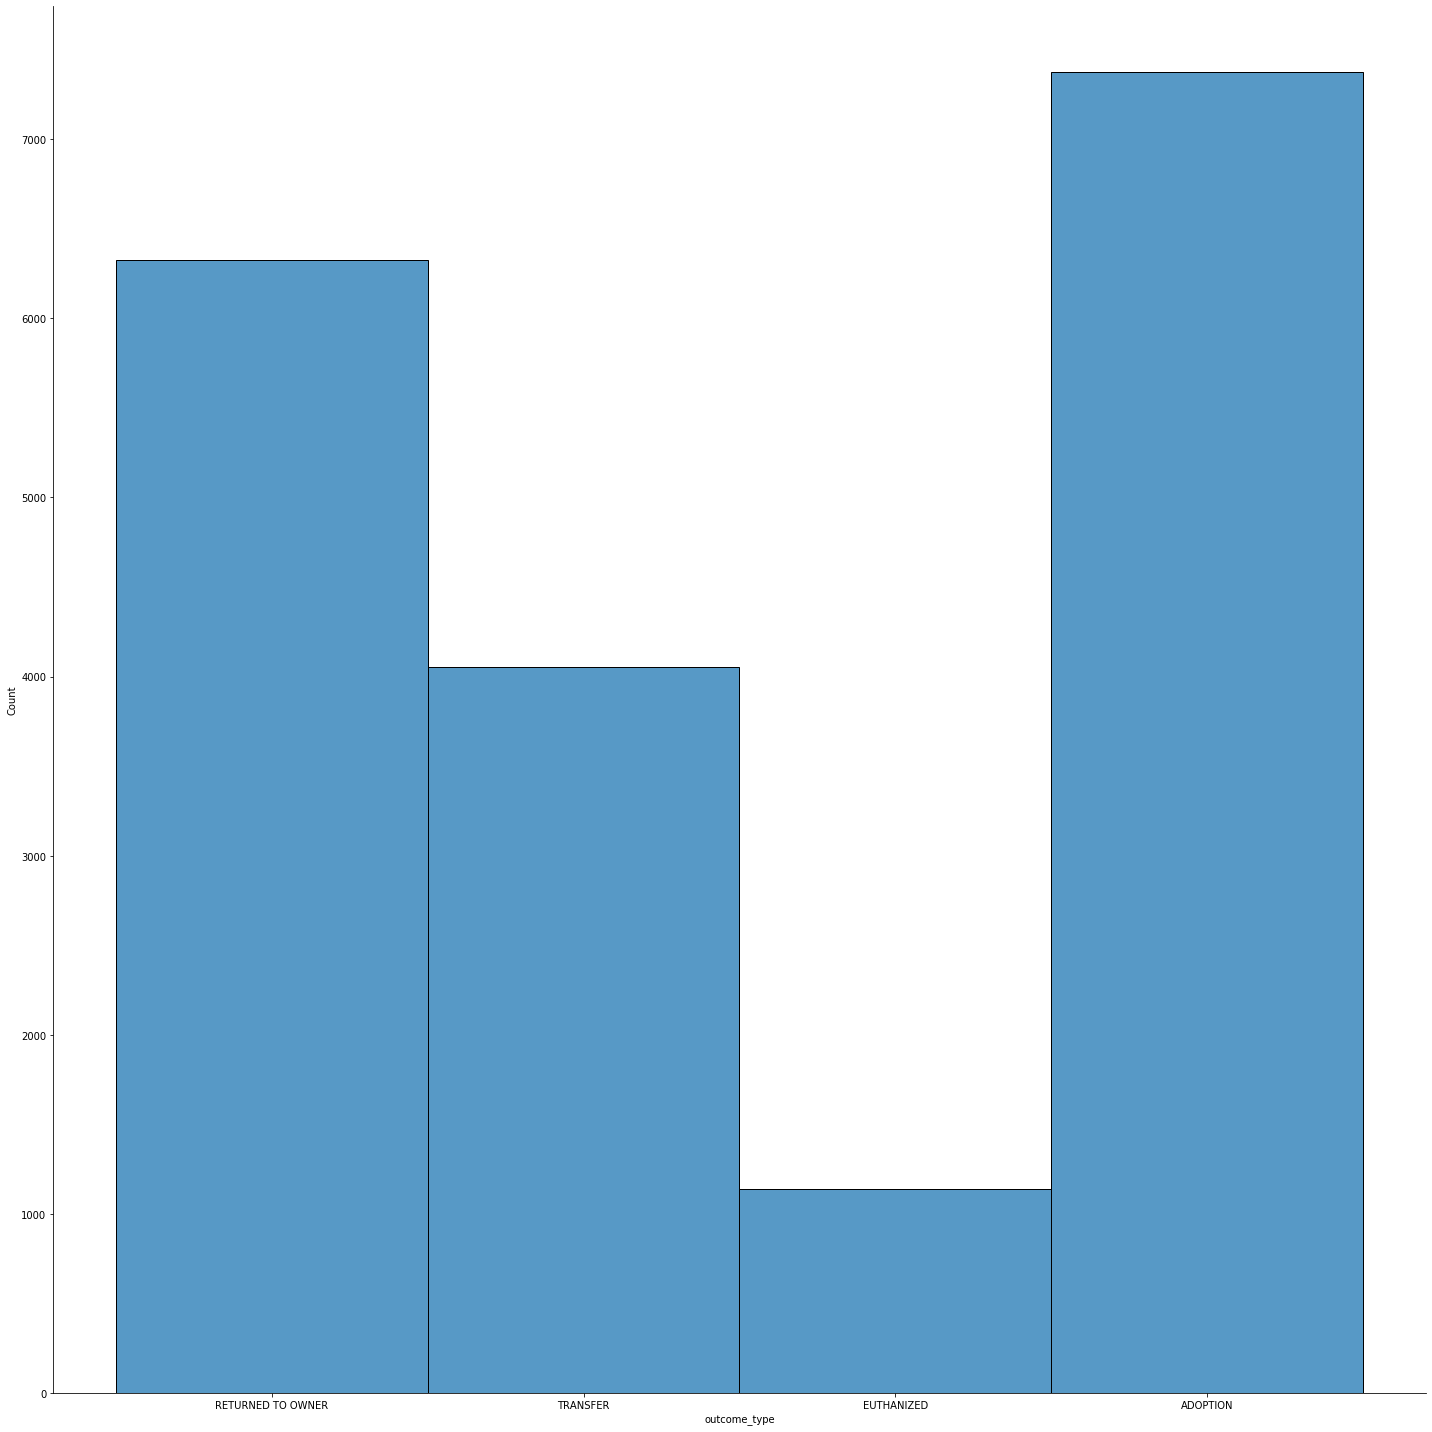

In [189]:
sns.displot(dog_df, x='outcome_type', height=20);

In [190]:
dog_df.kennel_status.value_counts()

UNAVAILABLE                 10950
IMPOUNDED                    5106
AVAILABLE                    1576
LAB                           761
RELEASED FROM QUARANTINE      326
EU RISK                       147
PRE-LAB                        14
PENDING                         9
EVALUATION                      1
Name: kennel_status, dtype: int64

In [191]:
cat_df.kennel_status.value_counts()

UNAVAILABLE                 3868
AVAILABLE                   1817
IMPOUNDED                   1048
LAB                          129
PENDING                      110
EU RISK                       57
RELEASED FROM QUARANTINE      29
Name: kennel_status, dtype: int64

In [192]:
cat_df.outcome_type.value_counts()

TRANSFER             3641
ADOPTION             2586
EUTHANIZED            678
RETURNED TO OWNER     153
Name: outcome_type, dtype: int64

In [193]:
df.animal_type.value_counts()

DOG          18890
CAT           7058
WILDLIFE       696
BIRD            88
LIVESTOCK       12
Name: animal_type, dtype: int64

https://askwonder.com/research/provide-list-kpis-animal-services-departments-within-municipalities-9yyy09551

1. visualize ALL animal types - but for real, dogs and cats 

2. visualize dog breeds and cat breeds - this is still fun

but what are our KPI benchmarks?

segmented by dog and cat 

3. Percentage of animals adopted or returned to owner (higher is better—fewer animals euthanized or died) 

33. Number of animals adopted 
34. Number of animals redeemed by owner
39. Number of transfers/fosters 
41. Adoption rates 
43. Return to owner rates 

- visualize by dog and cat adoption and returned 
- need a status (adopted or returned) outcome type
- need to calculate % groupby animal type and status and divide by ALL animals regardless of status type
- use a pie chart and  

i want to create a visualization that captures the percentage of animals adopted or return segmented by cats and dogs 

4. 32. Number of animals euthanized AND Percentage of animals not euthanized (lower is better) 

40. Euthanasia rates 
- need all animal outcomes 
- need a status 
- segment by dog and cat

5. Live release rate (higher is better) 

- need all animal outcomes 
- segment by dog and cat 
29. Live/Save rate (the number of live releases divided by the number of live impounds)
35. Number of animals died in shelter 

6. Percentage increase in number of dogs or cats? microchipped 

- segment by dogs only get number of chips vs no chips

12. Percentage increase in number of dogs and cats returned to owners

- segment by dog and cat
- grab outcomes 

28. Number of impounds 

- by dog
- by cat 
- by animal 






# kpi's

1. Number of impounds 
- show displot for overall, then dog, then cat
- provide numbers

2. Live release rate (higher is better) 
- show displot for overall, then dog, then cat
- provide numbers

3. Percentage of animals adopted or returned to owner (higher is better—fewer animals euthanized or died)
- show displot for overall, then dog, then cat 
- provide numbers

4. Number of animals euthanized AND Percentage of animals not euthanized (lower is better) 
- show displot for overall, then dog, then cat
- provide numbers

5. Percentage of number of dogs or cats? microchipped 
- show displot for dog, then cat
- provide numbers 

#### visualize ALL animal types - but for real, dogs and cats 

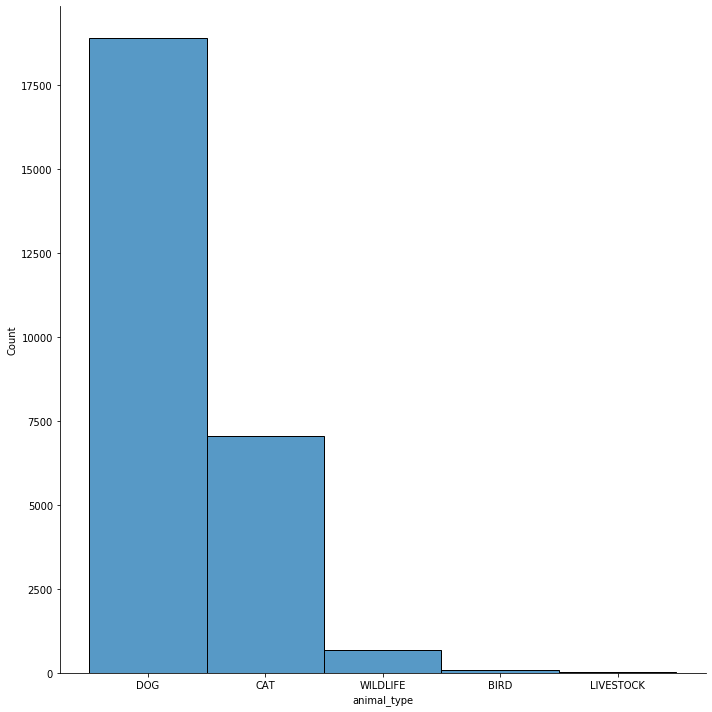

In [194]:
sns.displot(df, x='animal_type', height=10)

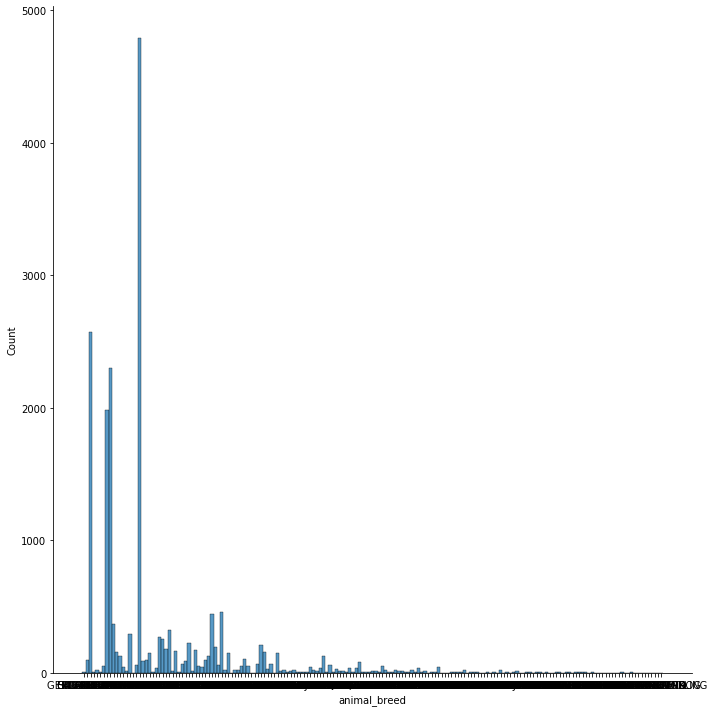

In [195]:
sns.displot(dog_df, x='animal_breed', height=10)

In [196]:
#Clean dog breeds
dog_df.loc[dog_df['animal_breed'].str.contains('PIT'), 'animal_breed'] = 'PIT BULL'
dog_df.loc[dog_df['animal_breed'].str.contains('STAFF'), 'animal_breed'] = 'PIT BULL'

dog_df.loc[dog_df['animal_breed'].str.contains('TERRIER'), 'animal_breed'] = 'TERRIER'
dog_df.loc[dog_df['animal_breed'].str.contains('TERR'), 'animal_breed'] = 'TERRIER'
dog_df.loc[dog_df['animal_breed'].str.contains('TER'), 'animal_breed'] = 'TERRIER'
dog_df.loc[dog_df['animal_breed'].str.contains('WEST HIGH'), 'animal_breed'] = 'TERRIER'
dog_df.loc[dog_df['animal_breed'].str.contains('SCHNAUZER'), 'animal_breed'] = 'TERRIER'


dog_df.loc[dog_df['animal_breed'].str.contains('RETR'), 'animal_breed'] = 'RETRIEVER'
dog_df.loc[dog_df['animal_breed'].str.contains('SHEPHERD'), 'animal_breed'] = 'SHEPHERD'
dog_df.loc[dog_df['animal_breed'].str.contains('CORGI'), 'animal_breed'] = 'CORGI'

dog_df.loc[dog_df['animal_breed'].str.contains('HOUND'), 'animal_breed'] = 'HOUND'
dog_df.loc[dog_df['animal_breed'].str.contains('BEAGLE'), 'animal_breed'] = 'HOUND'
dog_df.loc[dog_df['animal_breed'].str.contains('BLACK MOUTH'), 'animal_breed'] = 'HOUND'
dog_df.loc[dog_df['animal_breed'].str.contains('DACHSHUND'), 'animal_breed'] = 'HOUND'
dog_df.loc[dog_df['animal_breed'].str.contains('RIDGEBACK'), 'animal_breed'] = 'HOUND'

dog_df.loc[dog_df['animal_breed'].str.contains('CHIHUAHUA'), 'animal_breed'] = 'CHIHUAHUA'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [197]:
#Select top breeds, other, and Corgis and Pugs for suck up points
dog_breeds = ['PIT BULL', 'CHIHUAHUA', 'SHEPHERD', 'RETRIEVER', 'TERRIER', 'HOUND', 'CORGI', 'PUG']
dog_df.loc[~dog_df["animal_breed"].isin(dog_breeds), "animal_breed"] = "MUTT"

In [198]:
dog_df.animal_breed.value_counts()

PIT BULL     5213
MUTT         4342
SHEPHERD     2772
RETRIEVER    2395
CHIHUAHUA    2191
TERRIER      1333
HOUND         538
PUG            57
CORGI          49
Name: animal_breed, dtype: int64

In [199]:
#Clean cat breeds
cat_df.loc[cat_df['animal_breed'].str.contains('SIAMESE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('RUSSIAN BLUE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('BOMBAY'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('SAVANNAH'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('BURMESE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('HAVANA BROWN'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('COLORPOINT'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('KORAT'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('JAPAN BOBTAIL'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('TONKINESE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('SPHYNX'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('TONKINESE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('CORNISH REX'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('OCICAT'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('TONKINESE'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('EGYPTIAN MAU'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('SH'), 'animal_breed'] = 'DOMESTIC SH'
cat_df.loc[cat_df['animal_breed'].str.contains('ABYSSINIAN'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('CHARTREUX'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('BENGAL'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('RAGDOLL'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('BALINESE'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('MANX'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('SCOTTISH FOLD'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('SNOWSHOE'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('AMER WIREHAIR'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('SOMALI'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('MH'), 'animal_breed'] = 'DOMESTIC MH'
cat_df.loc[cat_df['animal_breed'].str.contains('HIMALAYAN'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('MAINE COON'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('PERSIAN'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('NORWGN FOREST'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('ANGORA'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('TURKISH VAN'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('BIRMAN'), 'animal_breed'] = 'DOMESTIC LH'
cat_df.loc[cat_df['animal_breed'].str.contains('LH'), 'animal_breed'] = 'DOMESTIC LH'

In [200]:
cat_df.animal_breed.value_counts()

DOMESTIC SH    6394
DOMESTIC MH     549
DOMESTIC LH     115
Name: animal_breed, dtype: int64

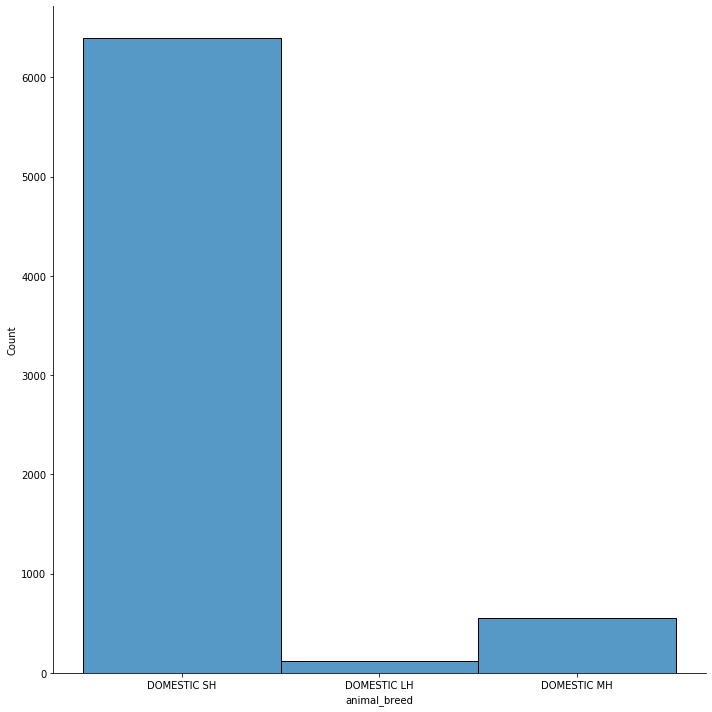

In [201]:
sns.displot(cat_df, x='animal_breed', height=10)

#### 3. Percentage of animals adopted or returned to owner (higher is better—fewer animals euthanized or died) 

33. Number of animals adopted 
34. Number of animals redeemed by owner
39. Number of transfers/fosters 
41. Adoption rates 
43. Return to owner rates 

- visualize by dog and cat adoption and returned 
- need a status (adopted or returned) outcome type
- need to calculate % groupby animal type and status and divide by ALL animals regardless of status type
- use a pie chart and  

i want to create a visualization that captures the percentage of animals adopted or return segmented by cats and dogs 


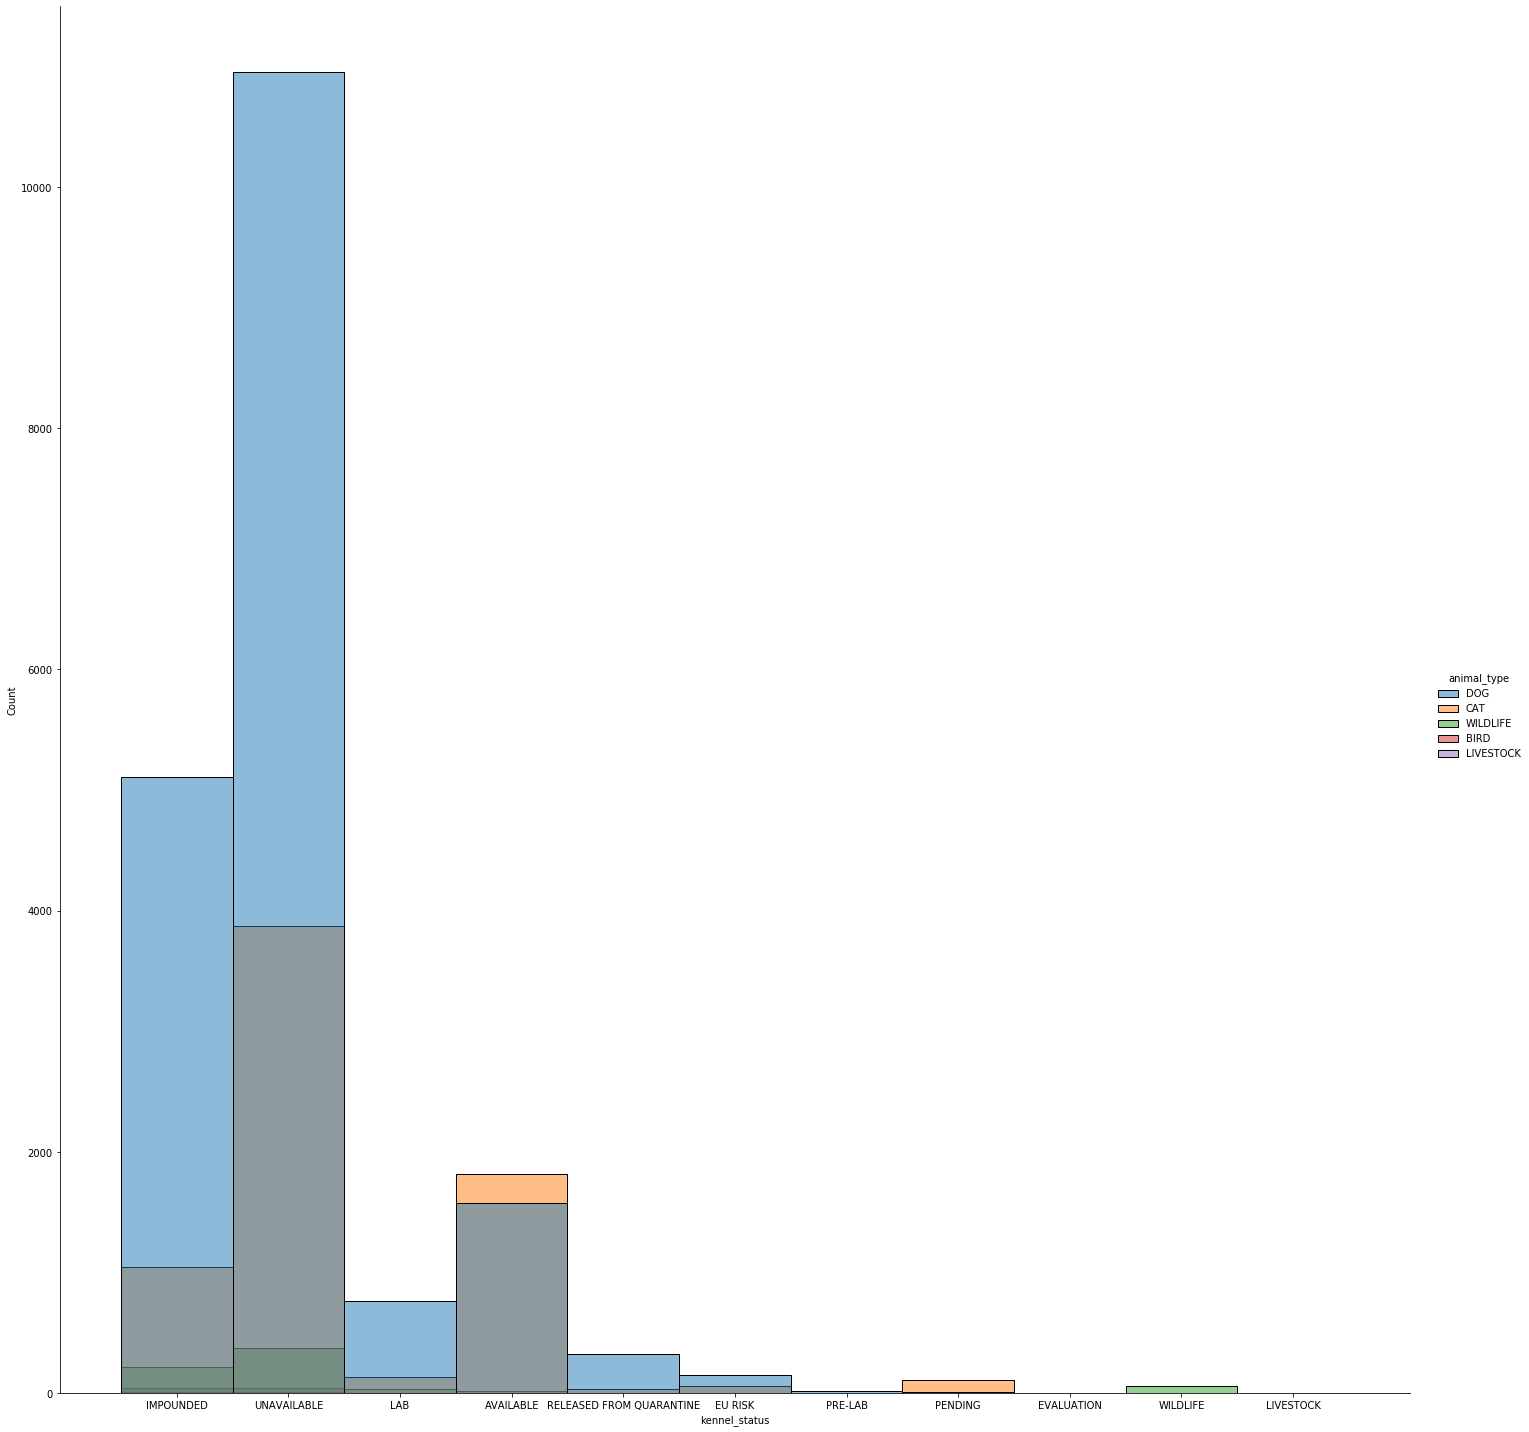

In [202]:
sns.displot(df, x='kennel_status', hue= 'animal_type', height=20)

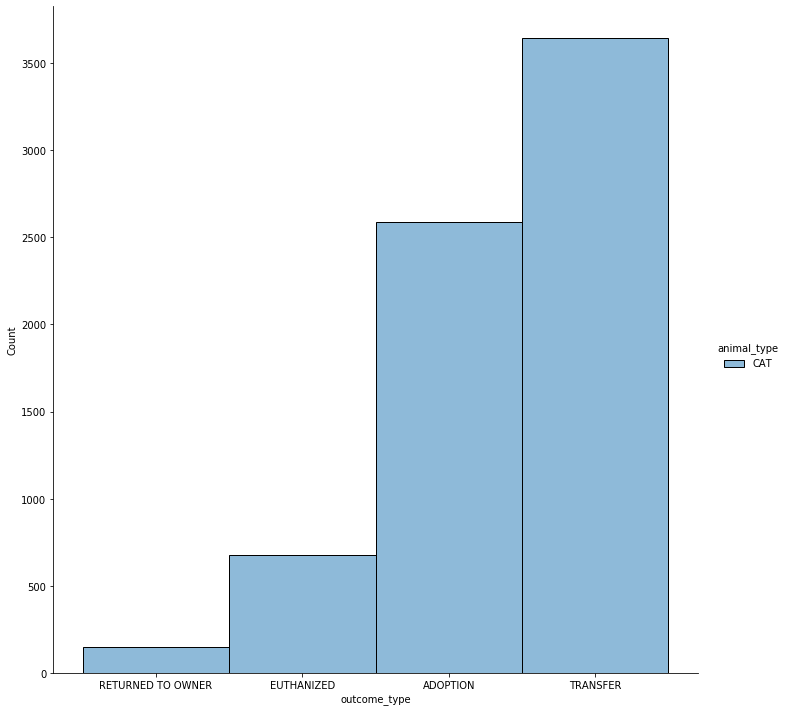

In [203]:
sns.displot(cat_df, x='outcome_type', hue= 'animal_type', height=10)

In [204]:
df.groupby('animal_type').outcome_type.value_counts()

animal_type  outcome_type     
BIRD         TRANSFER               55
             EUTHANIZED             23
             ADOPTION                6
             RETURNED TO OWNER       4
CAT          TRANSFER             3641
             ADOPTION             2586
             EUTHANIZED            678
             RETURNED TO OWNER     153
DOG          ADOPTION             7371
             RETURNED TO OWNER    6325
             TRANSFER             4053
             EUTHANIZED           1141
LIVESTOCK    TRANSFER                6
             ADOPTION                2
             EUTHANIZED              2
             RETURNED TO OWNER       2
WILDLIFE     EUTHANIZED            509
             ADOPTION              107
             TRANSFER               69
             RETURNED TO OWNER      11
Name: outcome_type, dtype: int64

In [205]:
df.groupby('outcome_type').animal_type.value_counts()

outcome_type       animal_type
ADOPTION           DOG            7371
                   CAT            2586
                   WILDLIFE        107
                   BIRD              6
                   LIVESTOCK         2
EUTHANIZED         DOG            1141
                   CAT             678
                   WILDLIFE        509
                   BIRD             23
                   LIVESTOCK         2
RETURNED TO OWNER  DOG            6325
                   CAT             153
                   WILDLIFE         11
                   BIRD              4
                   LIVESTOCK         2
TRANSFER           DOG            4053
                   CAT            3641
                   WILDLIFE         69
                   BIRD             55
                   LIVESTOCK         6
Name: animal_type, dtype: int64

In [206]:
df.groupby('chip_status').animal_type.value_counts()

chip_status     animal_type
CHIP            DOG             7301
                CAT             1366
                WILDLIFE           6
NO CHIP         DOG            10022
                CAT             5076
                WILDLIFE         230
                BIRD              35
                LIVESTOCK          7
UNABLE TO SCAN  DOG             1567
                CAT              616
                WILDLIFE         460
                BIRD              53
                LIVESTOCK          5
Name: animal_type, dtype: int64

In [207]:
df.groupby('animal_type').outcome_type.value_counts()

animal_type  outcome_type     
BIRD         TRANSFER               55
             EUTHANIZED             23
             ADOPTION                6
             RETURNED TO OWNER       4
CAT          TRANSFER             3641
             ADOPTION             2586
             EUTHANIZED            678
             RETURNED TO OWNER     153
DOG          ADOPTION             7371
             RETURNED TO OWNER    6325
             TRANSFER             4053
             EUTHANIZED           1141
LIVESTOCK    TRANSFER                6
             ADOPTION                2
             EUTHANIZED              2
             RETURNED TO OWNER       2
WILDLIFE     EUTHANIZED            509
             ADOPTION              107
             TRANSFER               69
             RETURNED TO OWNER      11
Name: outcome_type, dtype: int64

In [208]:
df.outcome_type.value_counts()

ADOPTION             10072
TRANSFER              7824
RETURNED TO OWNER     6495
EUTHANIZED            2353
Name: outcome_type, dtype: int64

In [209]:
dog_df.outcome_type.value_counts()

ADOPTION             7371
RETURNED TO OWNER    6325
TRANSFER             4053
EUTHANIZED           1141
Name: outcome_type, dtype: int64

In [210]:
cat_df.outcome_type.value_counts()

TRANSFER             3641
ADOPTION             2586
EUTHANIZED            678
RETURNED TO OWNER     153
Name: outcome_type, dtype: int64

In [211]:
df.head()

,animal_id,animal_type,animal_breed,kennel_number,kennel_status,intake_type,intake_subtype,reason,staff_id,intake_date,due_out,intake_condition,outcome_type,outcome_subtype,outcome_date,outcome_condition,chip_status,animal_origin,month,year,length_of_stay,est_length_of_stay,difference_in_stay
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,OWNER SURRENDER,GENERAL,PERSNLISSU,CDM,2019-11-08,2019-11-14,APP SICK,RETURNED TO OWNER,WALK IN,2019-11-09,APP SICK,CHIP,OVER THE COUNTER,NOV.2019,FY2020,1 days,6 days,5 days
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,STRAY,AT LARGE,OTHER,MG1718,2019-10-03,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,RETURNED TO OWNER,FIELD,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,NO CHIP,FIELD,OCT.2019,FY2020,0 days,0 days,0 days
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,OWNER SURRENDER,GENERAL,OTHER,RA 1549,2019-10-11,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,TREATABLE REHABILITABLE NON-CONTAGIOUS,CHIP,FIELD,OCT.2019,FY2020,4 days,6 days,2 days
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,STRAY,AT LARGE,OTHRINTAKS,JR,2019-11-08,2019-11-14,APP WNL,RETURNED TO OWNER,WALK IN,2019-11-09,APP WNL,CHIP,OVER THE COUNTER,NOV.2019,FY2020,1 days,6 days,5 days
6,A0578275,DOG,BICHON FRISE,LFD 081,UNAVAILABLE,OWNER SURRENDER,GENERAL,MEDICAL,CDM,2019-11-01,2019-11-01,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,MEDICAL-CONTAGIOUS,2019-11-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,CHIP,OVER THE COUNTER,NOV.2019,FY2020,1 days,0 days,-1 days


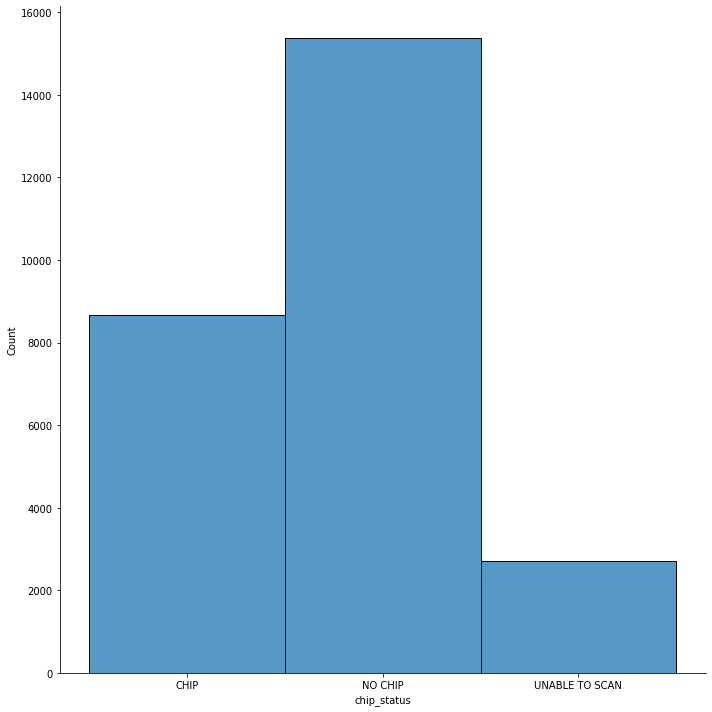

In [212]:
sns.displot(df, x='chip_status', height = 10)

In [213]:
cat_df.chip_status.value_counts()

NO CHIP           5076
CHIP              1366
UNABLE TO SCAN     616
Name: chip_status, dtype: int64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26744 entries, 0 to 31917
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   animal_id           26744 non-null  object         
 1   animal_type         26744 non-null  object         
 2   animal_breed        26744 non-null  object         
 3   kennel_number       26744 non-null  object         
 4   kennel_status       26744 non-null  object         
 5   intake_type         26744 non-null  object         
 6   intake_subtype      26744 non-null  object         
 7   reason              26744 non-null  object         
 8   staff_id            26744 non-null  object         
 9   intake_date         26744 non-null  datetime64[ns] 
 10  due_out             26744 non-null  datetime64[ns] 
 11  intake_condition    26744 non-null  object         
 12  outcome_type        26744 non-null  object         
 13  outcome_subtype     26744 non-n

In [230]:
df.outcome_type.value_counts()

ADOPTION             10072
TRANSFER              7824
RETURNED TO OWNER     6495
EUTHANIZED            2353
Name: outcome_type, dtype: int64